In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('Scrap Carteira 2021_abril.csv', sep=';')
dados.head()

,Unnamed: 0,Preço_hoje,Liquidez_media,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,Setor,Sub_setor
0,AALR3,"8,99","6.554.504,98","-10,92","0,87",-%,"0,46","-0,82","0,35",Saúde,Serv.Méd.Hospit..Análises e Diagnósticos
1,ABCB4,"14,82","10.408.091,70","10,16","0,76","4,79%",-,"1,54","2,28",Financeiro e Outros,Intermediários Financeiros
2,ABEV3,"15,25","324.841.037,78","21,08","3,19","3,22%","-0,19","0,72","0,75",Consumo não Cíclico,Bebidas
3,ADHM3,"1,56","94.201,44","-4,09","-1,29",-%,-,"-0,38","7,03",Saúde,Serv.Méd.Hospit..Análises e Diagnósticos
4,AERI3,"9,23","37.671.096,83","62,48","7,32",-%,"0,47","0,15",NaN,Bens Industriais,Máquinas e Equipamentos


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      550 non-null    object
 1   Preço_hoje      550 non-null    object
 2   Liquidez_media  550 non-null    object
 3   P/L             550 non-null    object
 4   P/VP            550 non-null    object
 5   Dy 12m 2021     550 non-null    object
 6   Dl/Pl_hoje      550 non-null    object
 7   Lpa_2020        548 non-null    object
 8   Lpa_2019        524 non-null    object
 9   Setor           550 non-null    object
 10  Sub_setor       550 non-null    object
dtypes: object(11)
memory usage: 47.4+ KB


In [4]:
# Tratamento Dy 12m 2021
dados['Dy 12m 2021'] = dados['Dy 12m 2021'].str.extract('(.*)%')
dados['Dy 12m 2021'] = dados['Dy 12m 2021'].replace('-', '0.00', regex=True)
dados['Dy 12m 2021'] = dados['Dy 12m 2021'].replace(',', '.', regex=True)
dados['Dy 12m 2021'] = pd.to_numeric(dados['Dy 12m 2021'])
dados['Dy 12m 2021'] = dados['Dy 12m 2021'] / 100

In [5]:
# Tratamento Dl/Pl_hoje
dados['Dl/Pl_hoje'] = dados['Dl/Pl_hoje'].replace(',', '.', regex=True)
dados['Dl/Pl_hoje'][dados['Dl/Pl_hoje'] == '-'] = dados['Dl/Pl_hoje'][dados['Dl/Pl_hoje'] == '-'].replace('-', np.NaN, regex=True)
dados['Dl/Pl_hoje'] = pd.to_numeric(dados['Dl/Pl_hoje'])

<ipython-input-5-2674c7db36ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Dl/Pl_hoje'][dados['Dl/Pl_hoje'] == '-'] = dados['Dl/Pl_hoje'][dados['Dl/Pl_hoje'] == '-'].replace('-', np.NaN, regex=True)


In [6]:
# Tratamento Lpa_2020
dados['Lpa_2020'] = dados['Lpa_2020'].replace('\.', '', regex=True)
dados['Lpa_2020'] = dados['Lpa_2020'].replace(',', '.', regex=True)
dados['Lpa_2020'][dados['Lpa_2020'] == '-'] = dados['Lpa_2020'][dados['Lpa_2020'] == '-'].replace('-', np.NaN, regex=True)
dados['Lpa_2020'] = pd.to_numeric(dados['Lpa_2020'])

<ipython-input-6-7ef71260df06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Lpa_2020'][dados['Lpa_2020'] == '-'] = dados['Lpa_2020'][dados['Lpa_2020'] == '-'].replace('-', np.NaN, regex=True)


In [7]:
dados.head()

,Unnamed: 0,Preço_hoje,Liquidez_media,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,Setor,Sub_setor
0,AALR3,"8,99","6.554.504,98","-10,92","0,87",0.0000,0.46,-0.82,"0,35",Saúde,Serv.Méd.Hospit..Análises e Diagnósticos
1,ABCB4,"14,82","10.408.091,70","10,16","0,76",0.0479,NaN,1.54,"2,28",Financeiro e Outros,Intermediários Financeiros
2,ABEV3,"15,25","324.841.037,78","21,08","3,19",0.0322,-0.19,0.72,"0,75",Consumo não Cíclico,Bebidas
3,ADHM3,"1,56","94.201,44","-4,09","-1,29",0.0000,NaN,-0.38,"7,03",Saúde,Serv.Méd.Hospit..Análises e Diagnósticos
4,AERI3,"9,23","37.671.096,83","62,48","7,32",0.0000,0.47,0.15,NaN,Bens Industriais,Máquinas e Equipamentos


In [8]:
# Tratamento Lpa_2019
dados['Lpa_2019'] = dados['Lpa_2019'].replace('\.', '', regex=True)
dados['Lpa_2019'] = dados['Lpa_2019'].replace(',', '.', regex=True)
dados['Lpa_2019'][dados['Lpa_2019'] == '-'] = dados['Lpa_2019'][dados['Lpa_2019'] == '-'].replace('-', np.NaN, regex=True)
dados['Lpa_2019'] = pd.to_numeric(dados['Lpa_2019'])

<ipython-input-8-2866d2e5fde4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Lpa_2019'][dados['Lpa_2019'] == '-'] = dados['Lpa_2019'][dados['Lpa_2019'] == '-'].replace('-', np.NaN, regex=True)


In [9]:
# Tratamento Liquidez_media
dados[dados['Liquidez_media'].str.contains('%', regex=True)]

,Unnamed: 0,Preço_hoje,Liquidez_media,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,Setor,Sub_setor
14,ALUP11,"25,94",100 %,"8,07","0,85",0.0324,0.77,3.21,3.04,Utilidade Pública,Energia Elétrica
54,BIDI11,"223,48",100 %,"-7.908,57","17,23",0.0006,NaN,-0.03,2.33,Financeiro e Outros,Intermediários Financeiros
69,BPAC11,"106,32",100 %,"30,21","3,71",0.0114,NaN,3.63,4.27,Financeiro e Outros,Intermediários Financeiros
219,ENGI11,"44,04",100 %,"10,88","2,13",0.0313,1.89,4.05,1.25,Utilidade Pública,Energia Elétrica
308,KLBN11,"28,58",100 %,"-12,92","7,33",0.0000,4.51,-2.21,0.62,Materiais Básicos,Madeira e Papel
437,RNEW11,"12,82",100 %,"7,95","-0,16",0.0000,NaN,1.61,-7.29,Utilidade Pública,Energia Elétrica
449,SANB11,"40,95",100 %,"11,02","1,82",0.0250,NaN,3.58,4.38,Financeiro e Outros,Intermediários Financeiros
452,SAPR11,"20,84",100 %,"6,32","0,91",0.0477,0.40,3.30,10.72,Utilidade Pública,Água e Saneamento
486,SULA11,"32,64",100 %,"5,92","1,72",0.0550,-1.88,5.85,3.00,Financeiro e Outros,Previdência e Seguros
490,TAEE11,"40,63",100 %,"6,19","2,32",0.0790,0.89,6.57,2.91,Utilidade Pública,Energia Elétrica


In [10]:
# Tratamento Liquidez_media
dados.at[14, 'Liquidez_media'] = '18.565.417,93'
dados.at[54, 'Liquidez_media'] = '302.462.044,17'
dados.at[69, 'Liquidez_media'] = '460.993.439,88'
dados.at[219, 'Liquidez_media'] = '81.701.793,32'
dados.at[308, 'Liquidez_media'] = '280.360.071,15'
dados.at[437, 'Liquidez_media'] = '211.905,22'
dados.at[449, 'Liquidez_media'] = '134.343.397,78'
dados.at[452, 'Liquidez_media'] = '53.465.421,24'
dados.at[486, 'Liquidez_media'] = '139.872.564,73'
dados.at[490, 'Liquidez_media'] = '92.407.294,46'
dados.at[507, 'Liquidez_media'] = '25.546.318,03'

In [11]:
dados.shape

(550, 11)

In [12]:
# Tratamento Liquidez_media
dados['Liquidez_media'] = dados['Liquidez_media'].replace('\.', '', regex=True)
dados['Liquidez_media'] = dados['Liquidez_media'].replace(',', '.', regex=True)
dados['Liquidez_media'][dados['Liquidez_media'] == '-'] = dados['Liquidez_media'][dados['Liquidez_media'] == '-'].replace('-', np.NaN, regex=True)
dados = dados.dropna(subset=['Liquidez_media'])
dados['Liquidez_media'] = pd.to_numeric(dados['Liquidez_media'])
dados['Liquidez_media'] = dados['Liquidez_media'].astype('int64')

<ipython-input-12-2ce71380f112>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Liquidez_media'][dados['Liquidez_media'] == '-'] = dados['Liquidez_media'][dados['Liquidez_media'] == '-'].replace('-', np.NaN, regex=True)


In [13]:
# Tratamento Preço_hoje
dados['Preço_hoje'] = dados['Preço_hoje'].replace('\.', '', regex=True)
dados['Preço_hoje'] = dados['Preço_hoje'].replace(',', '.', regex=True)
dados['Preço_hoje'][dados['Preço_hoje'] == '-'] = dados['Preço_hoje'][dados['Preço_hoje'] == '-'].replace('-', np.NaN, regex=True)
dados['Preço_hoje'] = pd.to_numeric(dados['Preço_hoje'])

<ipython-input-13-f6479db444ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Preço_hoje'][dados['Preço_hoje'] == '-'] = dados['Preço_hoje'][dados['Preço_hoje'] == '-'].replace('-', np.NaN, regex=True)


In [14]:
# Tratamento P/L
dados['P/L'] = dados['P/L'].replace('\.', '', regex=True)
dados['P/L'] = dados['P/L'].replace(',', '.', regex=True)
dados['P/L'][dados['P/L'] == '-'] = dados['P/L'][dados['P/L'] == '-'].replace('-', np.NaN, regex=True)
dados['P/L'] = pd.to_numeric(dados['P/L'])

<ipython-input-14-88f98349dc09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['P/L'][dados['P/L'] == '-'] = dados['P/L'][dados['P/L'] == '-'].replace('-', np.NaN, regex=True)


In [15]:
# Tratamento P/VP
dados['P/VP'] = dados['P/VP'].replace('\.', '', regex=True)
dados['P/VP'] = dados['P/VP'].replace(',', '.', regex=True)
dados['P/VP'][dados['P/VP'] == '-'] = dados['P/VP'][dados['P/VP'] == '-'].replace('-', np.NaN, regex=True)
dados['P/VP'] = pd.to_numeric(dados['P/VP'])

<ipython-input-15-bfb375078987>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['P/VP'][dados['P/VP'] == '-'] = dados['P/VP'][dados['P/VP'] == '-'].replace('-', np.NaN, regex=True)


In [16]:
dados.head()

,Unnamed: 0,Preço_hoje,Liquidez_media,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,Setor,Sub_setor
0,AALR3,8.99,6554504,-10.92,0.87,0.0000,0.46,-0.82,0.35,Saúde,Serv.Méd.Hospit..Análises e Diagnósticos
1,ABCB4,14.82,10408091,10.16,0.76,0.0479,NaN,1.54,2.28,Financeiro e Outros,Intermediários Financeiros
2,ABEV3,15.25,324841037,21.08,3.19,0.0322,-0.19,0.72,0.75,Consumo não Cíclico,Bebidas
3,ADHM3,1.56,94201,-4.09,-1.29,0.0000,NaN,-0.38,7.03,Saúde,Serv.Méd.Hospit..Análises e Diagnósticos
4,AERI3,9.23,37671096,62.48,7.32,0.0000,0.47,0.15,NaN,Bens Industriais,Máquinas e Equipamentos


In [17]:
for i, v in zip(range(len(dados['Setor'].unique())), dados['Setor'].unique()):
    print(i, v)

0 Saúde
1 Financeiro e Outros
2 Consumo não Cíclico
3 Bens Industriais
4 Utilidade Pública
5 Consumo Cíclico
6 Materiais Básicos
7 Petróleo. Gás e Biocombustíveis
8 Tecnologia da Informação
9 Comunicações


In [18]:
for i, v in zip(range(len(dados['Sub_setor'].unique())), dados['Sub_setor'].unique()):
    print(i, v)

0 Serv.Méd.Hospit..Análises e Diagnósticos
1 Intermediários Financeiros
2 Bebidas
3 Máquinas e Equipamentos
4 Energia Elétrica
5 Agropecuária
6 Viagens e Lazer
7 Tecidos. Vestuário e Calçados
8 Serviços
9 Exploração de Imóveis
10 Comércio
11 Água e Saneamento
12 Diversos
13 Previdência e Seguros
14 Outros
15 Mineração
16 Construção Civil
17 Construção e Engenharia
18 Transporte
19 Serviços Financeiros Diversos
20 Equipamentos
21 Alimentos Processados
22 Comércio e Distribuição
23 Hoteis e Restaurantes
24 Produtos de Uso Pessoal e de Limpeza
25 Petróleo. Gás e Biocombustíveis
26 Químicos
27 Holdings Diversificadas
28 Programas e Serviços
29 Gás
30 Siderurgia e Metalurgia
31 Madeira e Papel
32 Material de Transporte
33 Utilidades Domésticas
34 Automóveis e Motocicletas
35 Mídia
36 Embalagens
37 Telecomunicações
38 Computadores e Equipamentos
39 Materiais Diversos


In [19]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 0 to 549
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      465 non-null    object 
 1   Preço_hoje      465 non-null    float64
 2   Liquidez_media  465 non-null    int64  
 3   P/L             464 non-null    float64
 4   P/VP            465 non-null    float64
 5   Dy 12m 2021     465 non-null    float64
 6   Dl/Pl_hoje      358 non-null    float64
 7   Lpa_2020        461 non-null    float64
 8   Lpa_2019        424 non-null    float64
 9   Setor           465 non-null    object 
 10  Sub_setor       465 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 63.6+ KB


# Checkpoint 1

In [20]:
df1 = dados.copy()

In [21]:
df1.head()

,Unnamed: 0,Preço_hoje,Liquidez_media,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,Setor,Sub_setor
0,AALR3,8.99,6554504,-10.92,0.87,0.0000,0.46,-0.82,0.35,Saúde,Serv.Méd.Hospit..Análises e Diagnósticos
1,ABCB4,14.82,10408091,10.16,0.76,0.0479,NaN,1.54,2.28,Financeiro e Outros,Intermediários Financeiros
2,ABEV3,15.25,324841037,21.08,3.19,0.0322,-0.19,0.72,0.75,Consumo não Cíclico,Bebidas
3,ADHM3,1.56,94201,-4.09,-1.29,0.0000,NaN,-0.38,7.03,Saúde,Serv.Méd.Hospit..Análises e Diagnósticos
4,AERI3,9.23,37671096,62.48,7.32,0.0000,0.47,0.15,NaN,Bens Industriais,Máquinas e Equipamentos


In [22]:
lista_setor = df1['Setor'].unique().tolist()

In [23]:
# dicionario com todas os setores por linha a serem substituidas
indice_setor = []
indice_setores = {}
for i, v in zip(lista_setor, (range(len(lista_setor)))):
    indice_setores[i] = v
    indice_setor.append(indice_setores)
#indice_setores

In [24]:
indice_setores

{'Saúde': 0,
 'Financeiro e Outros': 1,
 'Consumo não Cíclico': 2,
 'Bens Industriais': 3,
 'Utilidade Pública': 4,
 'Consumo Cíclico': 5,
 'Materiais Básicos': 6,
 'Petróleo. Gás e Biocombustíveis': 7,
 'Tecnologia da Informação': 8,
 'Comunicações': 9}

In [25]:
df1['Setor'] = df1['Setor'].replace(indice_setores.keys(), indice_setores.values(), regex=True)

In [26]:
df1 = df1.drop(['Sub_setor'], axis=1)

In [27]:
df1.head()

,Unnamed: 0,Preço_hoje,Liquidez_media,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,Setor
0,AALR3,8.99,6554504,-10.92,0.87,0.0000,0.46,-0.82,0.35,0
1,ABCB4,14.82,10408091,10.16,0.76,0.0479,NaN,1.54,2.28,1
2,ABEV3,15.25,324841037,21.08,3.19,0.0322,-0.19,0.72,0.75,2
3,ADHM3,1.56,94201,-4.09,-1.29,0.0000,NaN,-0.38,7.03,0
4,AERI3,9.23,37671096,62.48,7.32,0.0000,0.47,0.15,NaN,3


In [28]:
df1.isna().sum()

Unnamed: 0          0
Preço_hoje          0
Liquidez_media      0
P/L                 1
P/VP                0
Dy 12m 2021         0
Dl/Pl_hoje        107
Lpa_2020            4
Lpa_2019           41
Setor               0
dtype: int64

# Checkpoint 1.5
## Aqui tratarei duas soluções, uma removendo todos os NaN e outra substituindo os que forem possiveis

In [29]:
# Remoção de todos os NaN
df1_dnan = df1.dropna(subset=['P/L', 'Dl/Pl_hoje', 'Lpa_2019', 'Lpa_2020'])

In [30]:
df1_dnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 0 to 549
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      323 non-null    object 
 1   Preço_hoje      323 non-null    float64
 2   Liquidez_media  323 non-null    int64  
 3   P/L             323 non-null    float64
 4   P/VP            323 non-null    float64
 5   Dy 12m 2021     323 non-null    float64
 6   Dl/Pl_hoje      323 non-null    float64
 7   Lpa_2020        323 non-null    float64
 8   Lpa_2019        323 non-null    float64
 9   Setor           323 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 27.8+ KB


In [31]:
# Remoção de todos os NaN, exceto DL/PL, pois todos os bancos teoricamente não tem dividas então eles não vem com nenhum valor.
# Assim todas as empresas com DL/PL estão sendo tratadas como zero, mas isso é sucetivel a analises mais profundas.
df1_dlzero = df1.dropna(subset=['P/L', 'Lpa_2019', 'Lpa_2020'])

In [32]:
df1_dlzero['Dl/Pl_hoje'][df1_dlzero['Dl/Pl_hoje'].isna()] = df1_dlzero['Dl/Pl_hoje'][df1_dlzero['Dl/Pl_hoje'].isna()].replace(np.NaN, 0, regex=True)

<ipython-input-32-a7a3f3b7b6a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_dlzero['Dl/Pl_hoje'][df1_dlzero['Dl/Pl_hoje'].isna()] = df1_dlzero['Dl/Pl_hoje'][df1_dlzero['Dl/Pl_hoje'].isna()].replace(np.NaN, 0, regex=True)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [33]:
df1_dlzero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 0 to 549
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      421 non-null    object 
 1   Preço_hoje      421 non-null    float64
 2   Liquidez_media  421 non-null    int64  
 3   P/L             421 non-null    float64
 4   P/VP            421 non-null    float64
 5   Dy 12m 2021     421 non-null    float64
 6   Dl/Pl_hoje      421 non-null    float64
 7   Lpa_2020        421 non-null    float64
 8   Lpa_2019        421 non-null    float64
 9   Setor           421 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 56.2+ KB


# Pré-Analisé exploratória

In [34]:
num_attributes_df1_dnan = df1_dnan.select_dtypes(include=['int64', 'float64'])

In [35]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes_df1_dnan.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes_df1_dnan.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes_df1_dnan.apply(np.std)).T
d2 = pd.DataFrame(num_attributes_df1_dnan.apply(min)).T
d3 = pd.DataFrame(num_attributes_df1_dnan.apply(max)).T
d4 = pd.DataFrame(num_attributes_df1_dnan.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes_df1_dnan.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes_df1_dnan.apply(lambda x: x.kurtosis())).T

# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,Preço_hoje,1.75,6.000000e+02,5.982500e+02,3.612975e+01,2.236000e+01,5.771261e+01,6.081526,48.744787
1,Liquidez_media,1068.00,2.579566e+09,2.579565e+09,6.906245e+07,3.300326e+06,2.094426e+08,7.738582,78.305874
2,P/L,-461.29,4.853700e+02,9.466600e+02,1.322966e+01,1.198000e+01,6.952464e+01,-0.946424,22.760837
3,P/VP,0.13,1.139700e+02,1.138400e+02,4.353189e+00,1.970000e+00,1.076741e+01,6.542077,50.084420
4,Dy 12m 2021,0.00,5.047000e-01,5.047000e-01,2.951641e-02,1.430000e-02,5.043418e-02,5.098320,39.350828
5,Dl/Pl_hoje,-14.09,1.253400e+02,1.394300e+02,1.075944e+00,2.700000e-01,7.819726e+00,13.249076,202.664756
6,Lpa_2020,-64.96,3.615000e+01,1.011100e+02,1.458576e+00,9.600000e-01,7.758154e+00,-1.525292,24.038308
7,Lpa_2019,-66.29,2.693100e+02,3.356000e+02,2.293746e+00,9.700000e-01,1.674510e+01,12.559858,201.923121
8,Setor,0.00,9.000000e+00,9.000000e+00,3.826625e+00,4.000000e+00,1.994024e+00,-0.034651,-0.124934


In [36]:
df1_dnan.describe()

,Preço_hoje,Liquidez_media,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,Setor
count,323.000000,3.230000e+02,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,36.129752,6.906245e+07,13.229659,4.353189,0.029516,1.075944,1.458576,2.293746,3.826625
std,57.802159,2.097675e+08,69.632511,10.784118,0.050512,7.831859,7.770191,16.771079,1.997118
min,1.750000,1.068000e+03,-461.290000,0.130000,0.000000,-14.090000,-64.960000,-66.290000,0.000000
25%,10.350000,5.612650e+04,5.410000,1.100000,0.000000,-0.050000,0.160000,0.210000,3.000000
50%,22.360000,3.300326e+06,11.980000,1.970000,0.014300,0.270000,0.960000,0.970000,4.000000
75%,39.905000,4.814288e+07,20.695000,3.380000,0.038500,0.780000,2.910000,2.215000,5.000000
max,600.000000,2.579566e+09,485.370000,113.970000,0.504700,125.340000,36.150000,269.310000,9.000000


In [37]:
num_attributes_df1_dlzero = df1_dlzero.select_dtypes(include=['int64', 'float64'])

In [38]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes_df1_dlzero.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes_df1_dlzero.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes_df1_dlzero.apply(np.std)).T
d2 = pd.DataFrame(num_attributes_df1_dlzero.apply(min)).T
d3 = pd.DataFrame(num_attributes_df1_dlzero.apply(max)).T
d4 = pd.DataFrame(num_attributes_df1_dlzero.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes_df1_dlzero.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes_df1_dlzero.apply(lambda x: x.kurtosis())).T

# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,Preço_hoje,0.57,6.000000e+02,5.994300e+02,3.373121e+01,2.139000e+01,5.330716e+01,6.217120,53.098645
1,Liquidez_media,1068.00,2.579566e+09,2.579565e+09,6.490679e+07,1.140864e+06,2.001022e+08,7.411580,74.732854
2,P/L,-8018.33,4.853700e+02,8.503700e+03,-4.794154e+01,9.200000e+00,6.662525e+02,-11.575756,134.146623
3,P/VP,-528.79,5.584300e+03,6.113090e+03,1.453658e+01,1.650000e+00,2.738134e+02,20.038374,408.571271
4,Dy 12m 2021,0.00,5.047000e-01,5.047000e-01,2.597435e-02,9.400000e-03,4.642323e-02,5.266963,43.881412
5,Dl/Pl_hoje,-14.09,1.253400e+02,1.394300e+02,8.254869e-01,5.000000e-02,6.864464e+00,15.119262,263.987647
6,Lpa_2020,-337.35,3.615000e+01,3.735000e+02,-2.349857e+00,7.900000e-01,2.837569e+01,-8.559388,83.234914
7,Lpa_2019,-180.29,2.693100e+02,4.496000e+02,-3.240618e-01,7.700000e-01,2.220410e+01,1.104452,70.115103
8,Setor,0.00,9.000000e+00,9.000000e+00,3.527316e+00,4.000000e+00,2.052133e+00,0.127872,-0.554487


In [39]:
df1_dlzero.describe()

,Preço_hoje,Liquidez_media,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,Setor
count,421.000000,4.210000e+02,421.000000,421.00000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,33.731211,6.490679e+07,-47.941544,14.53658,0.025974,0.825487,-2.349857,-0.324062,3.527316
std,53.370579,2.003402e+08,667.045211,274.13915,0.046478,6.872631,28.409453,22.230515,2.054574
min,0.570000,1.068000e+03,-8018.330000,-528.79000,0.000000,-14.090000,-337.350000,-180.290000,0.000000
25%,9.800000,5.530800e+04,-0.370000,0.77000,0.000000,0.000000,-0.030000,0.020000,1.000000
50%,21.390000,1.140864e+06,9.200000,1.65000,0.009400,0.050000,0.790000,0.770000,4.000000
75%,38.500000,3.996095e+07,18.900000,3.03000,0.036100,0.570000,2.330000,2.220000,5.000000
max,600.000000,2.579566e+09,485.370000,5584.30000,0.504700,125.340000,36.150000,269.310000,9.000000


# Análise Exploratória, Plotando alguns gráficos

<AxesSubplot:>

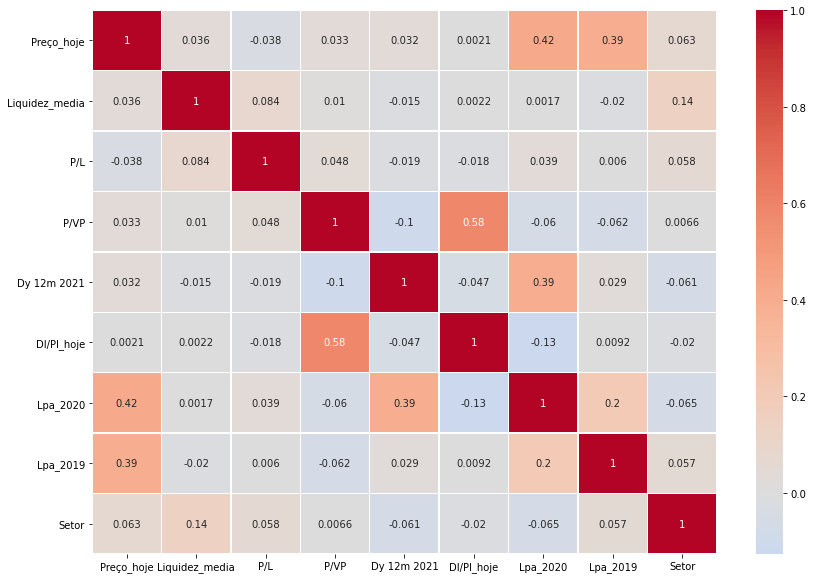

In [40]:
plt.figure(figsize=(14,10))
sns.heatmap(df1_dnan.corr(), cmap='coolwarm', annot=True, center=0, linewidths=0.5)

<AxesSubplot:>

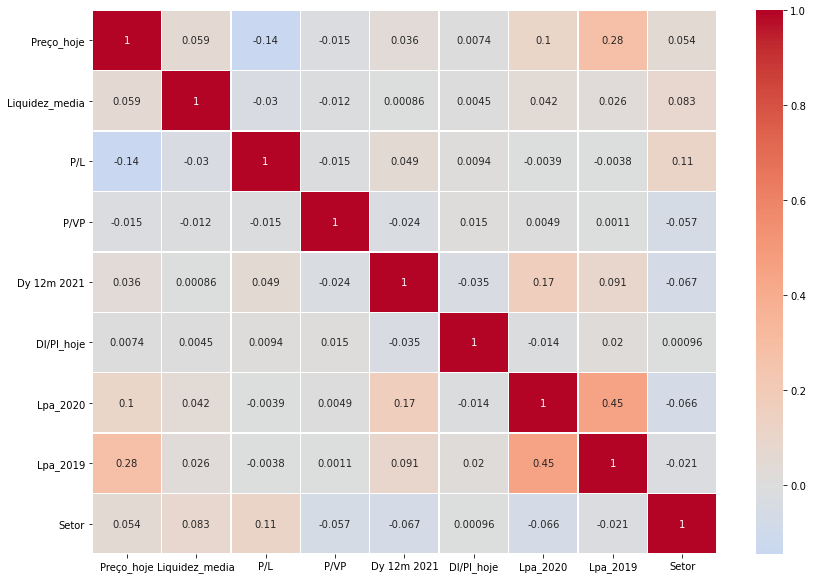

In [41]:
plt.figure(figsize=(14,10))
sns.heatmap(df1_dlzero.corr(), cmap='coolwarm', annot=True, center=0, linewidths=0.5)

In [42]:
df1_dnan.head()

,Unnamed: 0,Preço_hoje,Liquidez_media,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,Setor
0,AALR3,8.99,6554504,-10.92,0.87,0.0000,0.46,-0.82,0.35,0
2,ABEV3,15.25,324841037,21.08,3.19,0.0322,-0.19,0.72,0.75,2
5,AFLT3,8.90,23095,30.01,3.00,0.1306,-0.16,0.30,0.40,4
6,AGRO3,30.47,20812315,12.82,2.23,0.0233,0.44,3.14,2.10,2
7,AHEB3,22.89,7339,-8.17,54.14,0.0000,-14.09,-2.80,-18.16,5


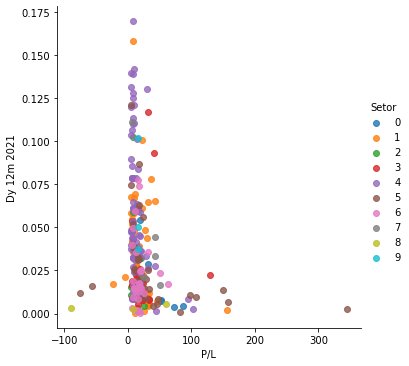

In [43]:
aux10 = df1_dlzero[(df1_dlzero['P/L'] > -100) & (df1_dlzero['Dy 12m 2021'] * 100) & (df1_dlzero['Dy 12m 2021'] < 0.2)]
# , scatter_kws={'alpha':0.3}
sns.lmplot(x='P/L', y='Dy 12m 2021', data=aux10, hue='Setor', fit_reg=False)

In [44]:
aux11 = df1_dlzero.sort_values(by='Dy 12m 2021', ascending=False)
aux11.head(15)

,Unnamed: 0,Preço_hoje,Liquidez_media,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,Setor
395,PEAB4,70.00,15008,1.94,1.59,0.5047,-0.38,36.15,3.55,1
394,PEAB3,71.00,32503,1.96,1.62,0.4523,-0.38,36.15,3.55,1
469,SMLS3,21.49,56347745,14.24,2.97,0.2465,-0.72,1.58,5.05,5
172,CSMG3,16.57,39960950,7.72,0.98,0.1699,0.46,2.15,5.95,4
95,BRSR3,14.11,171678,7.79,0.68,0.1585,0.00,1.52,3.10,1
133,CEPE6,27.00,21765,9.28,1.18,0.1419,2.78,2.91,2.43,4
159,CPLE6,6.37,88870178,4.46,0.86,0.1395,0.33,14.27,7.27,4
132,CEPE5,25.00,48278,8.60,1.10,0.1394,2.78,2.91,2.43,4
157,CPLE3,6.14,12915802,4.30,0.83,0.1316,0.33,14.27,7.27,4
5,AFLT3,8.90,23095,30.01,3.00,0.1306,-0.16,0.30,0.40,4


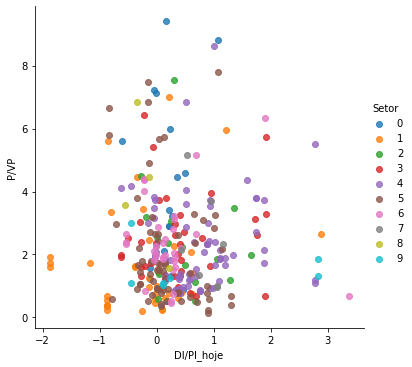

In [45]:
aux0 = df1_dnan[(df1_dnan['Dl/Pl_hoje'] < 4) & (df1_dnan['P/VP'] < 10)]
sns.lmplot(x='Dl/Pl_hoje', y='P/VP', data=aux0, hue='Setor' , fit_reg=False)
# , scatter_kws={'alpha':0.3}

In [46]:
df1_dnan[df1_dnan['Setor'] == 6]

,Unnamed: 0,Preço_hoje,Liquidez_media,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,Setor
76,BRAP3,63.75,3040481,15.12,1.97,0.0777,-0.01,4.22,-1.16,6
77,BRAP4,74.03,207362077,17.51,2.28,0.0738,-0.01,4.22,-1.16,6
166,CRPG3,66.20,15859,10.42,2.64,0.0133,-0.54,6.36,4.73,6
167,CRPG5,58.88,912582,9.24,2.34,0.0150,-0.54,6.36,4.73,6
168,CRPG6,59.02,66280,9.42,2.39,0.0147,-0.54,6.36,4.73,6
173,CSNA3,51.41,589711994,18.80,6.34,0.0002,1.91,2.73,1.29,6
196,DTEX3,21.14,45072554,32.18,2.81,0.0355,0.28,0.66,0.59,6
207,ELEK3,19.11,11501,24.46,2.66,0.0000,0.70,0.78,1.87,6
208,ELEK4,36.99,52244,47.34,5.15,0.0000,0.70,0.78,1.87,6
235,EUCA3,24.16,255473,15.52,1.51,0.0083,0.28,1.56,0.71,6


In [47]:
df1_dnan.head()

,Unnamed: 0,Preço_hoje,Liquidez_media,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,Setor
0,AALR3,8.99,6554504,-10.92,0.87,0.0000,0.46,-0.82,0.35,0
2,ABEV3,15.25,324841037,21.08,3.19,0.0322,-0.19,0.72,0.75,2
5,AFLT3,8.90,23095,30.01,3.00,0.1306,-0.16,0.30,0.40,4
6,AGRO3,30.47,20812315,12.82,2.23,0.0233,0.44,3.14,2.10,2
7,AHEB3,22.89,7339,-8.17,54.14,0.0000,-14.09,-2.80,-18.16,5


In [48]:
aux15 = df1_dnan[(df1_dnan['Liquidez_media'] > 100000) & (df1_dnan['Lpa_2020'] > 0) & 
                 (df1_dnan['Lpa_2019'] > 0) & (df1_dnan['Dl/Pl_hoje'] < 1) & (df1_dnan['Dy 12m 2021'] > 0) & 
                 (df1_dnan['P/L'] < 50)]
aux15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 2 to 548
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      115 non-null    object 
 1   Preço_hoje      115 non-null    float64
 2   Liquidez_media  115 non-null    int64  
 3   P/L             115 non-null    float64
 4   P/VP            115 non-null    float64
 5   Dy 12m 2021     115 non-null    float64
 6   Dl/Pl_hoje      115 non-null    float64
 7   Lpa_2020        115 non-null    float64
 8   Lpa_2019        115 non-null    float64
 9   Setor           115 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 9.9+ KB


<AxesSubplot:xlabel='Setor', ylabel='count'>

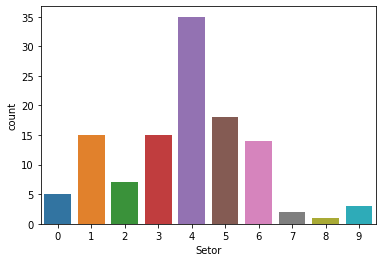

In [49]:
sns.countplot(data=aux15, x='Setor')

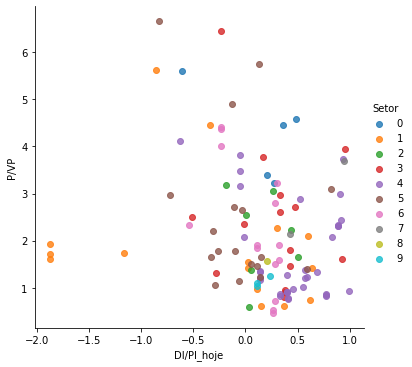

In [50]:
sns.lmplot(x='Dl/Pl_hoje', y='P/VP', data=aux15, hue='Setor' , fit_reg=False)

In [51]:
# dicionario com os setores
indice_setor = []
indice_setores_invertido = {}
for i, v in zip((range(len(lista_setor))), lista_setor):
    indice_setores_invertido[i] = v
    indice_setor.append(indice_setores_invertido)
indice_setores_invertido

{0: 'Saúde',
 1: 'Financeiro e Outros',
 2: 'Consumo não Cíclico',
 3: 'Bens Industriais',
 4: 'Utilidade Pública',
 5: 'Consumo Cíclico',
 6: 'Materiais Básicos',
 7: 'Petróleo. Gás e Biocombustíveis',
 8: 'Tecnologia da Informação',
 9: 'Comunicações'}

## Boxplot df1_dnan

<ipython-input-52-7e77aa36eec7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['Setor'] = aux1['Setor'].replace(indice_setores_invertido.keys(), indice_setores_invertido.values())


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Saúde'),
  Text(1, 0, 'Consumo não Cíclico'),
  Text(2, 0, 'Utilidade Pública'),
  Text(3, 0, 'Consumo Cíclico'),
  Text(4, 0, 'Financeiro e Outros'),
  Text(5, 0, 'Materiais Básicos'),
  Text(6, 0, 'Petróleo. Gás e Biocombustíveis'),
  Text(7, 0, 'Bens Industriais'),
  Text(8, 0, 'Tecnologia da Informação'),
  Text(9, 0, 'Comunicações')])

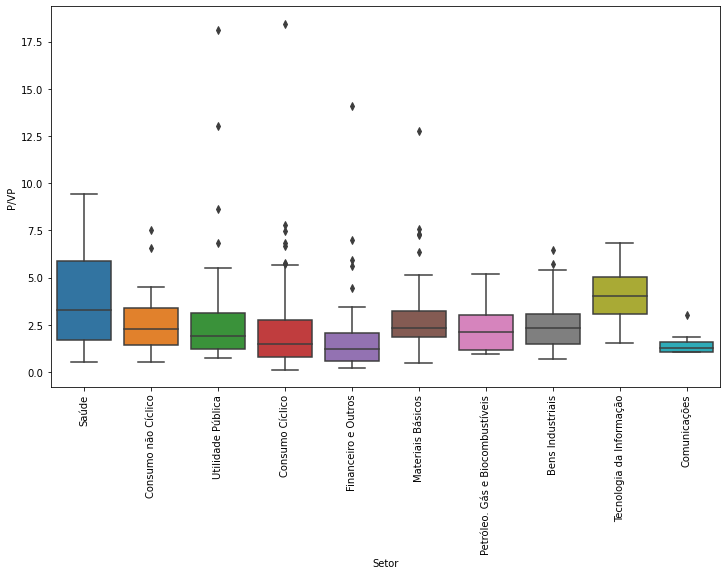

In [52]:
aux1 = df1_dnan
aux1['Setor'] = aux1['Setor'].replace(indice_setores_invertido.keys(), indice_setores_invertido.values())
aux1 = aux1[(df1_dnan['P/VP'] < 20)]
plt.figure(figsize=(12,7))
sns.boxplot(x='Setor', y='P/VP', data=aux1)
plt.xticks(rotation = 90)

<ipython-input-68-5a0826f494e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux2['Setor'] = aux2['Setor'].replace(indice_setores_invertido.keys(), indice_setores_invertido.values())


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Saúde'),
  Text(1, 0, 'Consumo não Cíclico'),
  Text(2, 0, 'Utilidade Pública'),
  Text(3, 0, 'Consumo Cíclico'),
  Text(4, 0, 'Financeiro e Outros'),
  Text(5, 0, 'Materiais Básicos'),
  Text(6, 0, 'Petróleo. Gás e Biocombustíveis'),
  Text(7, 0, 'Bens Industriais'),
  Text(8, 0, 'Tecnologia da Informação'),
  Text(9, 0, 'Comunicações')])

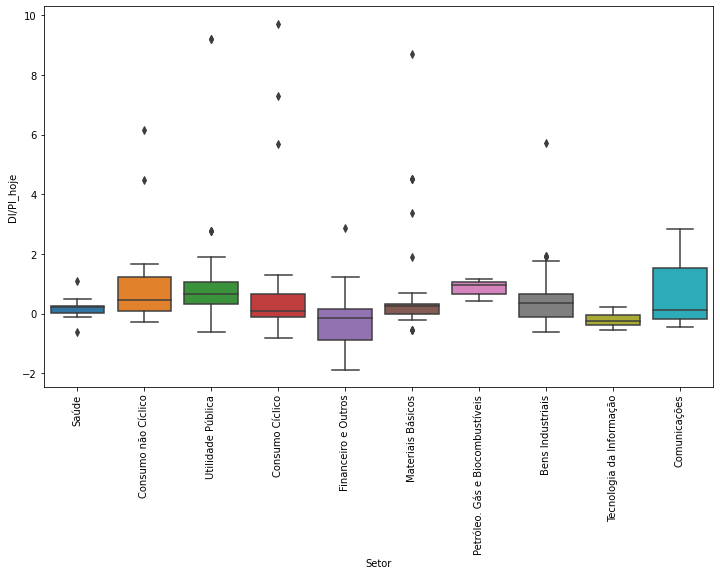

In [68]:
aux2 = df1_dnan
aux2['Setor'] = aux2['Setor'].replace(indice_setores_invertido.keys(), indice_setores_invertido.values())
aux2 = aux2[(aux2['Dl/Pl_hoje'] < 12) & (aux2['Dl/Pl_hoje'] > -4)]
plt.figure(figsize=(12,7))
sns.boxplot(x='Setor', y='Dl/Pl_hoje', data=aux2)
plt.xticks(rotation = 90)

## Boxplot df1_dlzero

<ipython-input-54-5304bd98f152>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux3['Setor'] = aux3['Setor'].replace(indice_setores_invertido.keys(), indice_setores_invertido.values())


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Saúde'),
  Text(1, 0, 'Financeiro e Outros'),
  Text(2, 0, 'Consumo não Cíclico'),
  Text(3, 0, 'Utilidade Pública'),
  Text(4, 0, 'Consumo Cíclico'),
  Text(5, 0, 'Bens Industriais'),
  Text(6, 0, 'Materiais Básicos'),
  Text(7, 0, 'Petróleo. Gás e Biocombustíveis'),
  Text(8, 0, 'Tecnologia da Informação'),
  Text(9, 0, 'Comunicações')])

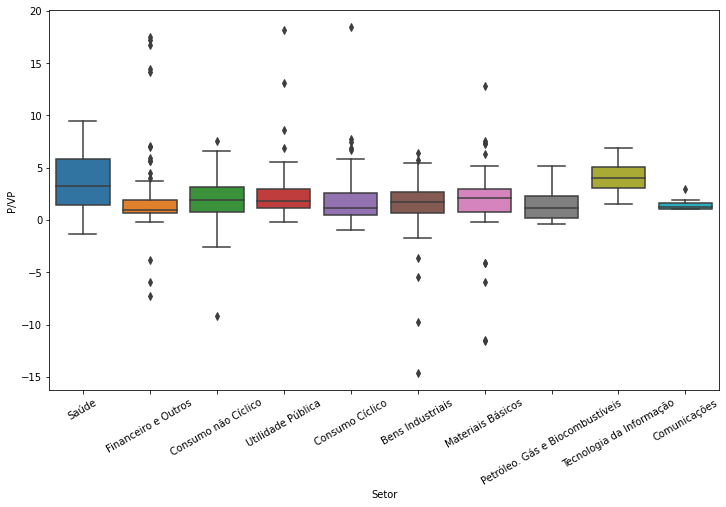

In [54]:
aux3 = df1_dlzero
aux3['Setor'] = aux3['Setor'].replace(indice_setores_invertido.keys(), indice_setores_invertido.values())
aux3 = aux3[(df1_dlzero['P/VP'] < 20) & (df1_dlzero['P/VP'] > -20)]
plt.figure(figsize=(12,7))
sns.boxplot(x='Setor', y='P/VP', data=aux3)
plt.xticks(rotation = 30)

<ipython-input-55-db67d47a569f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux4['Setor'] = aux4['Setor'].replace(indice_setores_invertido.keys(), indice_setores_invertido.values())


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Saúde'),
  Text(1, 0, 'Financeiro e Outros'),
  Text(2, 0, 'Consumo não Cíclico'),
  Text(3, 0, 'Utilidade Pública'),
  Text(4, 0, 'Consumo Cíclico'),
  Text(5, 0, 'Bens Industriais'),
  Text(6, 0, 'Materiais Básicos'),
  Text(7, 0, 'Petróleo. Gás e Biocombustíveis'),
  Text(8, 0, 'Tecnologia da Informação'),
  Text(9, 0, 'Comunicações')])

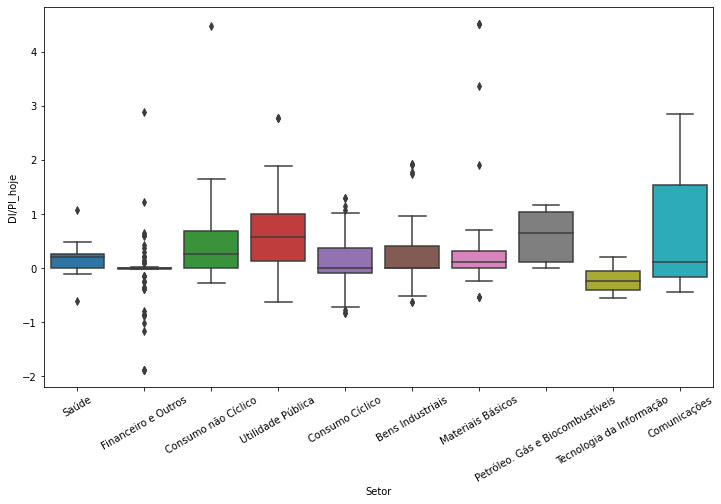

In [55]:
aux4 = df1_dlzero
aux4['Setor'] = aux4['Setor'].replace(indice_setores_invertido.keys(), indice_setores_invertido.values())
aux4 = aux4[(aux4['Dl/Pl_hoje'] < 5) & (aux4['Dl/Pl_hoje'] > -4)]
plt.figure(figsize=(12,7))
sns.boxplot(x='Setor', y='Dl/Pl_hoje', data=aux4)
plt.xticks(rotation = 30)

## Boxplot aux15

In [69]:
aux16 = aux15.copy()
aux16['Setor'] = aux16['Setor'].replace(indice_setores_invertido.keys(), indice_setores_invertido.values())

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Consumo não Cíclico'),
  Text(1, 0, 'Utilidade Pública'),
  Text(2, 0, 'Financeiro e Outros'),
  Text(3, 0, 'Petróleo. Gás e Biocombustíveis'),
  Text(4, 0, 'Bens Industriais'),
  Text(5, 0, 'Consumo Cíclico'),
  Text(6, 0, 'Materiais Básicos'),
  Text(7, 0, 'Saúde'),
  Text(8, 0, 'Tecnologia da Informação'),
  Text(9, 0, 'Comunicações')])

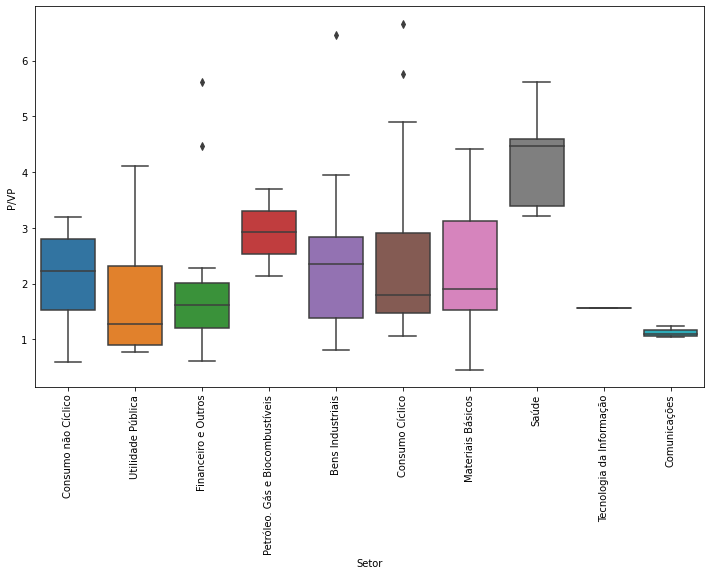

In [70]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Setor', y='P/VP', data=aux16)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Consumo não Cíclico'),
  Text(1, 0, 'Utilidade Pública'),
  Text(2, 0, 'Financeiro e Outros'),
  Text(3, 0, 'Petróleo. Gás e Biocombustíveis'),
  Text(4, 0, 'Bens Industriais'),
  Text(5, 0, 'Consumo Cíclico'),
  Text(6, 0, 'Materiais Básicos'),
  Text(7, 0, 'Saúde'),
  Text(8, 0, 'Tecnologia da Informação'),
  Text(9, 0, 'Comunicações')])

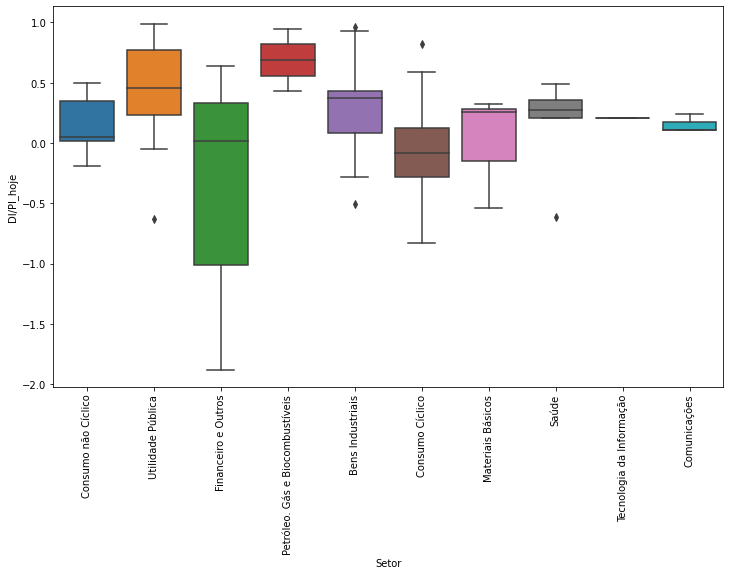

In [72]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Setor', y='Dl/Pl_hoje', data=aux16)
plt.xticks(rotation = 90)

## Salvando Arquivos Tratados

### Voltando a coluna Setor para números

In [58]:
df1_dnan['Setor'] = df1_dnan['Setor'].replace(indice_setores.keys(), indice_setores.values(), regex=True)

<ipython-input-58-f3ef08764284>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_dnan['Setor'] = df1_dnan['Setor'].replace(indice_setores.keys(), indice_setores.values(), regex=True)


In [59]:
df1_dlzero['Setor'] = df1_dlzero['Setor'].replace(indice_setores.keys(), indice_setores.values(), regex=True)

<ipython-input-59-4a73a0c200ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_dlzero['Setor'] = df1_dlzero['Setor'].replace(indice_setores.keys(), indice_setores.values(), regex=True)


In [60]:
#df1_dnan.to_csv('Projeto_Awari_abril_tratada_df1_dnan.csv', sep=';', index=False)

In [61]:
#df1_dlzero.to_csv('Projeto_Awari_abril_tratada_df1_dlzero.csv', sep=';', index=False)

In [62]:
aux15.to_csv('Projeto_Awari_abril_tratada_aux15.csv', sep=';', index=False)

## DataFrames ordenados

In [63]:
#df3.head()

In [64]:
#df_dlpl = df3.sort_values(by='dl/pl 2020')
#df_dlpl.head(10)

In [65]:
#df_dlpl2 = df3.dropna(subset=['dl/pl 2020']).sort_values(by='dl/pl 2020', ascending=False)
#df_dlpl2.head(10)

In [66]:
#df_pl2a = df3.dropna(subset=['p/l_2_anos']).sort_values(by='p/l_2_anos')
#df_pl2a.head(10)

In [67]:
#df_pl2a2 = df3.dropna(subset=['p/l_2_anos']).sort_values(by='p/l_2_anos', ascending=False)
#df_pl2a2.head(25)